<a href="https://colab.research.google.com/github/Saiesh-Halshikar/CNN-and-NN/blob/main/FSDS_Third_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The MNIST Dataset**


MNIST: *Modified National Institute of Standards and Technology*

In [1]:
28*28

784

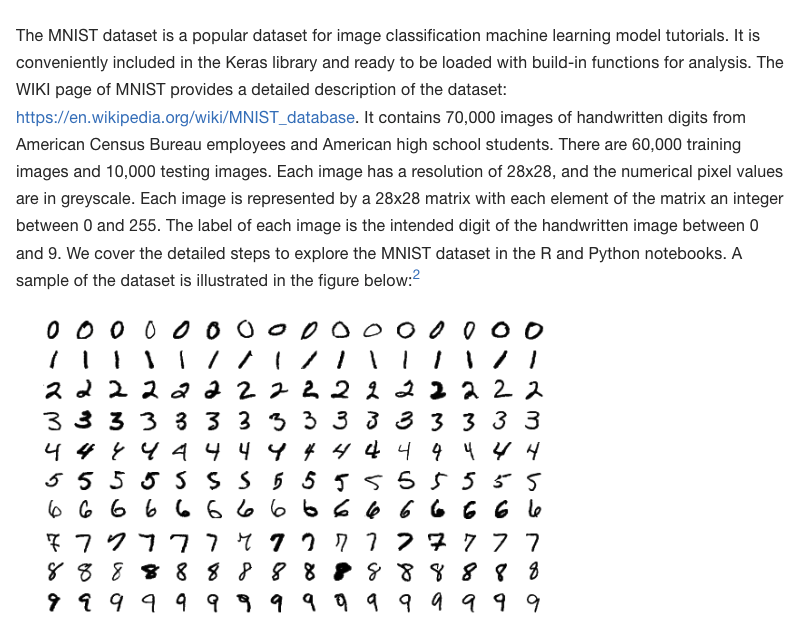

[link to the wiki page](https://en.wikipedia.org/wiki/MNIST_database)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense


In [3]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


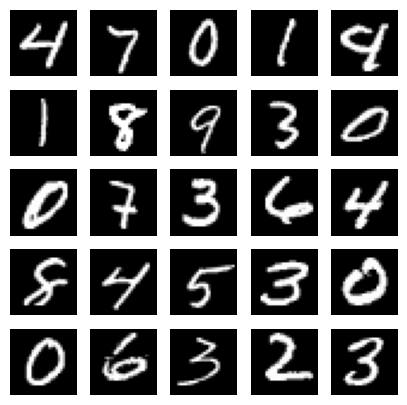

In [6]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [8]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [12]:
x_train.shape

(60000, 784)

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [14]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu'))
model.add(Dense(hidden_units,activation = 'relu'))
model.add(Dense(num_labels, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


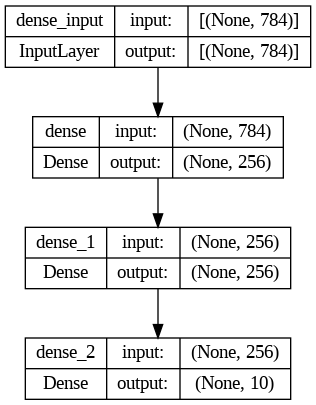

In [16]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 10ms/step - loss: 0.3102 - accuracy: 0.9112 - val_loss: 0.1531 - val_accuracy: 0.9563
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1139 - accuracy: 0.9663 - val_loss: 0.1358 - val_accuracy: 0.9605
Epoch 3/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0741 - accuracy: 0.9773 - val_loss: 0.0993 - val_accuracy: 0.9710
Epoch 4/20
329/329 [==============================] - 4s 13ms/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.1045 - val_accuracy: 0.9698
Epoch 5/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0958 - val_accuracy: 0.9729
Epoch 6/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0983 - val_accuracy: 0.9726
Epoch 7/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.1036 - val_accuracy: 0.9724


In [19]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9811

Test accuracy: 98.1%


In [20]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9929

Test accuracy: 99.3%


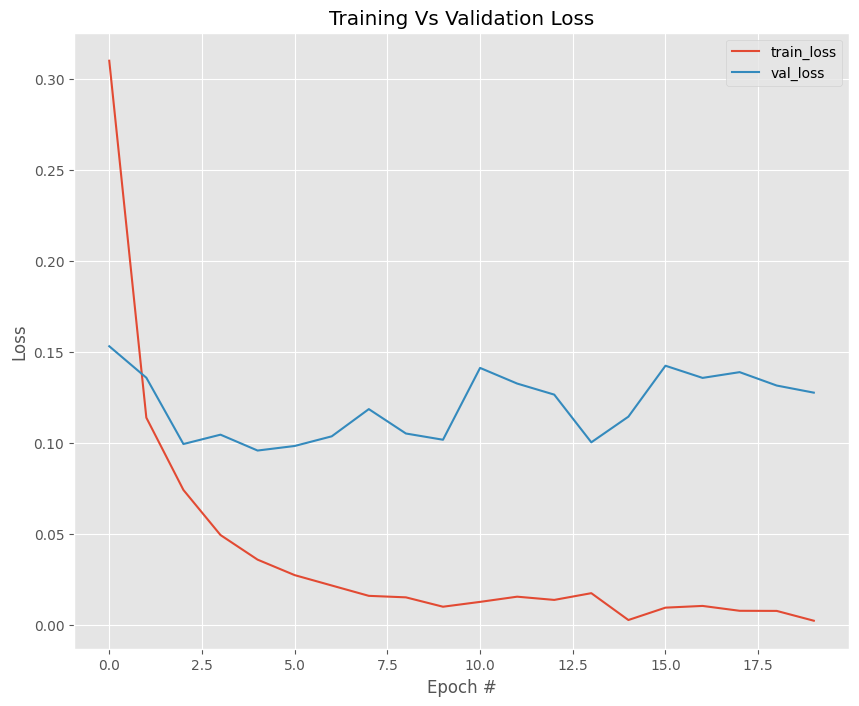

In [21]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [22]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 9ms/step - loss: 0.4958 - accuracy: 0.9076 - val_loss: 0.3081 - val_accuracy: 0.9457
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 0.2366 - accuracy: 0.9612 - val_loss: 0.2104 - val_accuracy: 0.9640
Epoch 3/20
329/329 [==============================] - 2s 8ms/step - loss: 0.1728 - accuracy: 0.9726 - val_loss: 0.1803 - val_accuracy: 0.9681
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1484 - accuracy: 0.9762 - val_loss: 0.1649 - val_accuracy: 0.9713
Epoch 5/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1362 - accuracy: 0.9784 - val_loss: 0.1734 - val_accuracy: 0.9680
Epoch 6/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1228 - accuracy: 0.9811 - val_loss: 0.1667 - val_accuracy: 0.9688
Epoch 7/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1141 - accuracy: 0.9827 - val_loss: 0.1510 - val_accuracy: 0.9731
Epoch

In [23]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1337 - accuracy: 0.9742

Test accuracy: 97.4%


In [24]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9837

Test accuracy: 98.4%


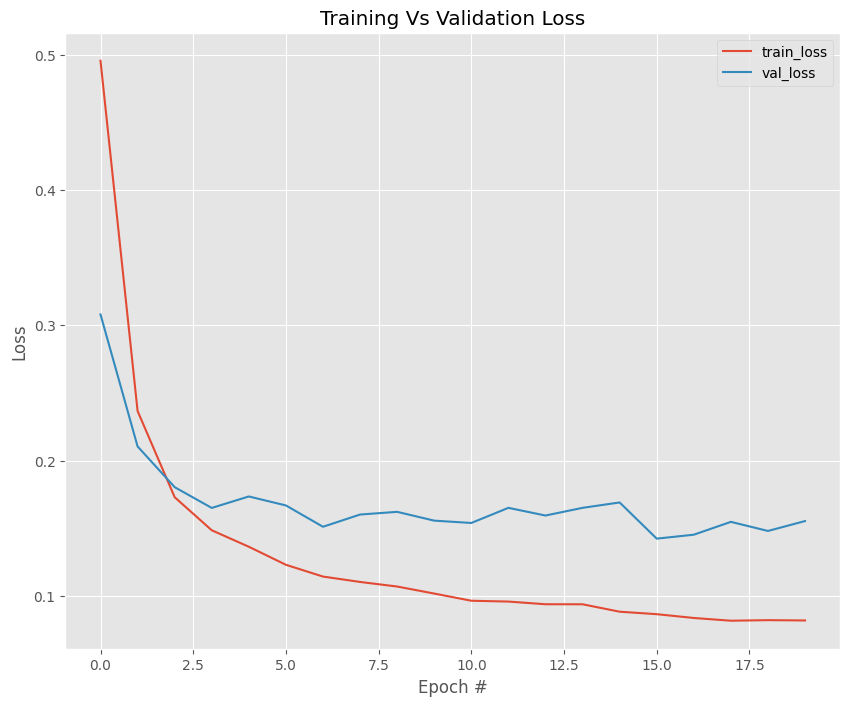

In [25]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [26]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 9ms/step - loss: 0.5044 - accuracy: 0.8438 - val_loss: 0.1854 - val_accuracy: 0.9456
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 0.2213 - accuracy: 0.9338 - val_loss: 0.1379 - val_accuracy: 0.9592
Epoch 3/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1709 - accuracy: 0.9487 - val_loss: 0.1263 - val_accuracy: 0.9634
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1430 - accuracy: 0.9564 - val_loss: 0.1091 - val_accuracy: 0.9684
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1275 - accuracy: 0.9610 - val_loss: 0.1122 - val_accuracy: 0.9687
Epoch 6/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1143 - accuracy: 0.9653 - val_loss: 0.1005 - val_accuracy: 0.9718
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1037 - accuracy: 0.9685 - val_loss: 0.0908 - val_accuracy: 0.9735
Epoc

In [27]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9789

Test accuracy: 97.9%


In [28]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9908

Test accuracy: 99.1%


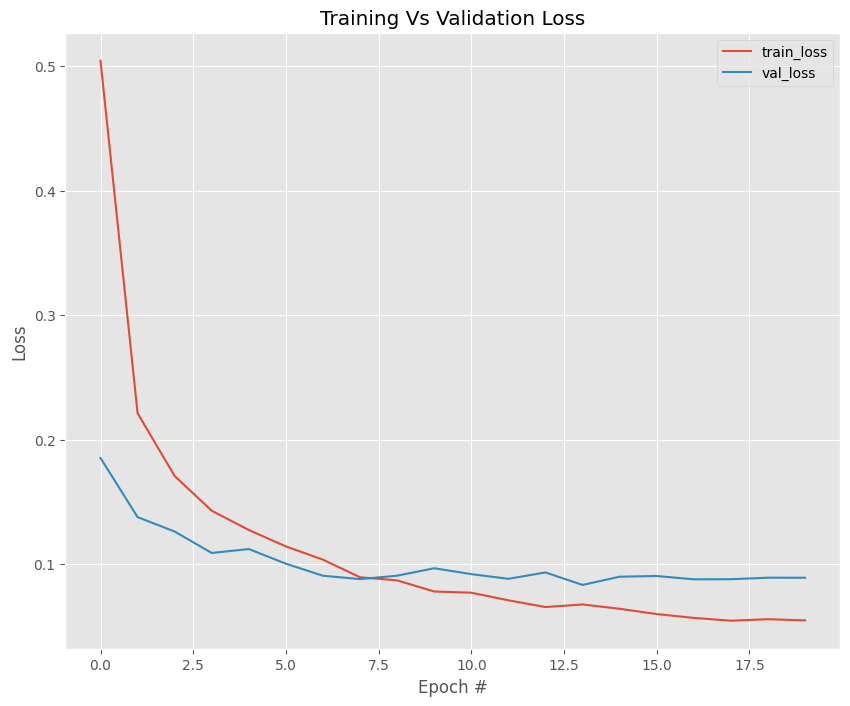

In [29]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Assignment

Combine both L2 and Dropout and report your findings. 
1. Did you experience any change in performance?
2. Did the error reduced?
3. Were there any significant improvement in the validation loss as against the training loss?

